<a href="https://colab.research.google.com/github/VielF/ColabProjects/blob/main/Exercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Engenharia Elétrica - Processamento Digital de Sinais
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bA}{\mathbf{A}}$
$\newcommand{\bB}{\mathbf{B}}$
$\newcommand{\mat}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\newcommand{\matt}[1]{\begin{matrix} #1 \end{matrix}}$



# Exercício 2

Este exercício aborda o processamento de sinais e processamento digital de sinais

<!--O exercício resolvido, em formato `.ipynb`, completo com explicações e gráficos integrados, deve ser submetido no local indicado pelo professor (ex: Blackboar -> Exercício 1) até o prazo especificado.-->

# Dicas para revisão

- Ler e praticar os tutoriais:
 - Python (se necessário): https://docs.python.org/3/tutorial
 - NumPy: https://numpy.org/doc/stable/user/quickstart.html
 - Matplotlib: https://matplotlib.org/tutorials/introductory/pyplot.html
 - Pandas (opcional): https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [ ]:
# Inicie importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

### Criação de um seno

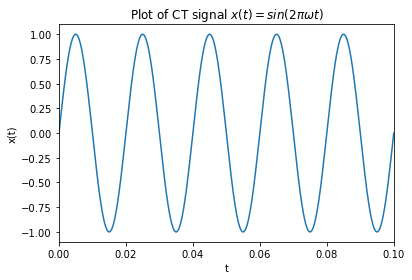

In [ ]:
#continuo
def cont_sin(time, sample_rate, frequency):
    time = time
    sample = sample_rate
    f = frequency
    t = np.linspace(0, time, sample)
    signal = np.sin(2*np.pi*f*t)
    return t,signal

t,signal_ct = cont_sin(time=0.1, sample_rate=1000, frequency=50)
plt.plot(t, signal_ct)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Plot of CT signal $x(t)= sin(2\pi \omega t)$')
plt.xlim([0, 0.1])
plt.show()

<StemContainer object of 3 artists>

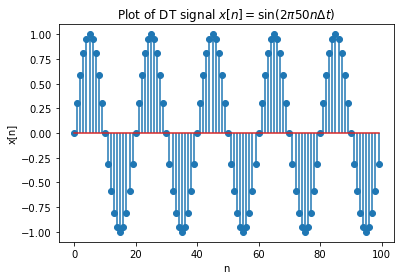

In [ ]:
#discreto com f = 50 Hz, mesmo usado no plot anterior, e amostragem seguindo a lei de Nyquist
def disc_sin(time, frequency):
    f = frequency
    t = time
    n = np.arange(2*f)
    dt = t/(2*f)   
    signal_sample = np.sin(2 * np.pi * f * n * dt)
    return n,signal_sample
    
n, samples = disc_sin(time=0.1, frequency=50)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title(r'Plot of DT signal $x[n] = \sin(2\pi 50 n \Delta t)$')
plt.stem(n, samples)

# 1. Gerando sinais variantes no tempo

1. Gere um seno que varie a frequência de 20 até 100 hz com 1000 amostras e t = 0.1.
2. Plote o sinal gerado.

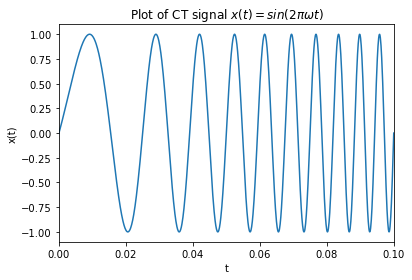

In [ ]:
#parametros

# Coloque o código aqui para gerar o sinal variando de 20 à 100 Hz

#plotagem


3. Gerar um sinal discretizado do sinal criado no exercício 2 com amostras de N posições
4. Plote o sinal

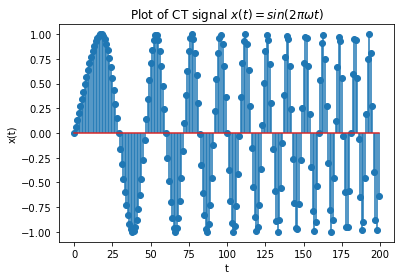

In [ ]:
#parametros


# Coloque o código aqui para gerar o sinal variando de 20 à 100 Hz


#plotagem


5. Varie a taxa de amostragem do sinal discretizado, diante das frequencias usadas, e observe o teorema de Nyquist aplicado. O que você conclui? Por quê?

### Dicas

- Você deve variar a fequência gradualmente, indo de 20 à 100 Hz, sendo assim, implemente matematicamente isso na equação do sin(). 
- A utilização de um laço de repetição pode se fazer necessária para facilitar a criação da variança de frequência. Você também pode utilizar a função `np.linspace()` pra gerar o intervalo de frequências.
- Você pode modificar as funções `cont_sin` e `disc_sin`


# 2 - Transformada de Fourier

1. Iremos usar a biblioteca `fft` da `scipy`. Gere um sinal de 400 Hz por 0.1 segundos, 1000 amostras e aplique a Transformada Rápida de Fourier.
2. Plote a transformada.

(Obs: Não é obirgatório reproduzir fielmente os gráficos plotados, mas pode ser usados de como guia, desde que seja plotado o que se pede).

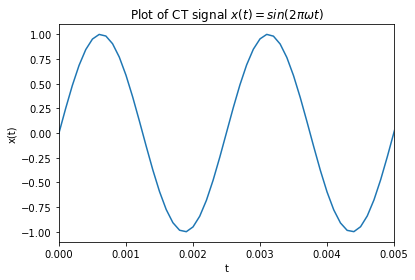

Value in index  40  is 0.50
Freq: 400 


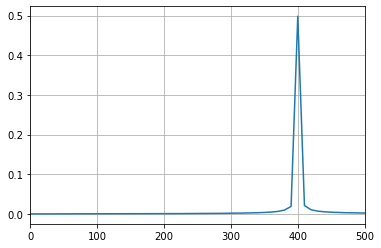

3. Gere dois sinais, apenas mudando alterando os parametros de frequência do exercicio anterior. O primeiro sinal deve ter 200 Hz e o segundo 350 Hz.
4. Some os dois sinais e plote o resultado (pode reduzir o plote para um intervalo menor para visualização).
5. Aplique FFT no sinal resultante e plote o espectro de frequências gerados.

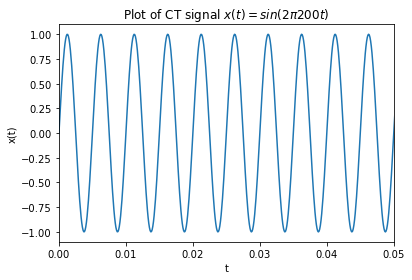

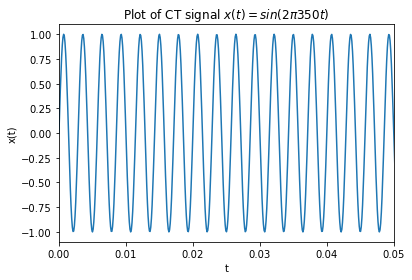

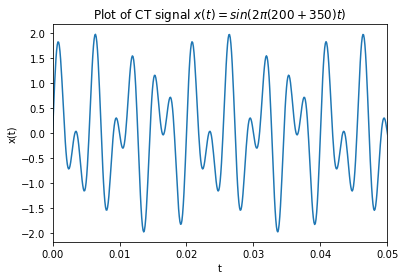

#### DTMF
DTMF é um sistema amplamente usado para identificar o pressionar de uma tecla baseado na combinação de frequências gerados em um teclado matricial. A cobinação de frequência permite identificar teclas conseguindo identificar as duas frequências que compõe o tom. Mais sobre pode ser lido em https://www.cram.org.br/wordpress/?p=1325.

Os tons usados pelo sistema DTMF são:

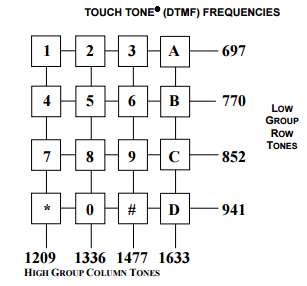

5. Diante disso, implemente um detector DTMF, capaz de encontrar os números da Univali: `0800 723 1300` (sem espaços) em um aquivo WAV gerado por esse site: https://www.audiocheck.net/audiocheck_dtmf.php.
6. Plote as harmônicas produzidas por cada tom, bem como o número identificado.
7. Compare com o gerado no programa OcenAudio. 


##### Dicas
- Leia sobre o uso de fft() e fftfreq() da scipy: https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html e https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq.
- As funções `np.argmax()` e `np.max()` restornam, respectivamente, o índice do maior valor de um array e o maior valor de um array.
- A função fft() retorna valores para as frequências negativas também, assim, é recomendavel que exclua a parte negativa e plote/use somente a parte positiva. Assim você pode usar `Vet[:N // 2]` para pegar somente a metada positiva, sendo o N o número de amostras do sinal usado.
- A função fftfreq() utiliza dois parmetros de entrada, sendo que o segundo é a diferença (período) entre as amostras. Assim, você pode apenas calcular a diferença entre o tempo em t=1 e o tempo em t=0 gerado pelo linspace().
- Os valores das frequências podem não ser exatamente o desejado, mas sim próximos. Sendo assim, você pode utilizar a função `roud()` para arrendodar os valores.

## Filtragem espacial

O filtro Média Movel é um dos filtros mais básico de se implementar mas oferece uma boa resposta na redução de ruído. Uma explicação do filtro pode ser encotrada no Cap. 15 do livro `The Scientist and Engineer's Guide to Digital Signal Processing`, o qual pode ser baixado gratuitamente em http://www.dspguide.com.

1. Crie um sinal senoidal de 200 Hz, 1000 amostras e t=0.1
2. Usando a função `np.random.normal()` crie ruído de baixa intensidade.
3. Some o ruído ao sinal de 200 Hz.
4. Plote o sinal com ruído.


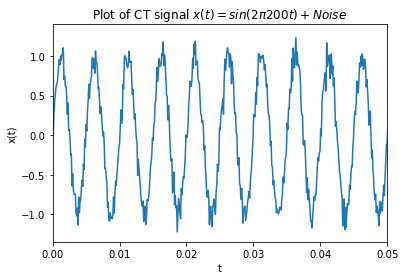

5. Implemente o filtro média móvel, podendo se basear no pseudo-código presente no Cap. 15 do livro indicado.
6. Escolha uma média adequada.
7. Plote o sinal filtrado.
8. Varie o valor da média, aumentado e veja o que acontece. O que você observa? Explique o motivo.

#### Dicas
- A implementação e explicação podem ser achadas no Cap. 15 do livro `The Scientist and Engineer's Guide to Digital Signal Processing`.

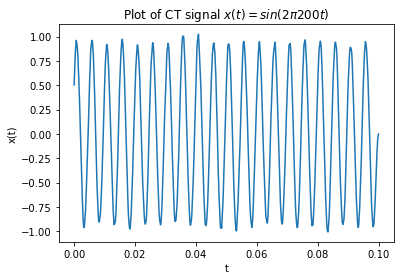